# Audio Signal for Machine Learning 

## Demystifying the Fourier Transform

#### The Fourier Transform is a mathematical tool that decomposes a signal into its constituent frequencies, allowing you to analyze and manipulate the frequency components of the signal.

$$
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} \, dt
$$

### 1. Requirements 

In [1]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

#### Loading the audio file

In [2]:
audio_path = "audio/piano_c.wav"
ipd.Audio(audio_path)

####  Loading the files to Librosa library

In [3]:
signal, sr = librosa.load(audio_path)

### 2. From Time to Frequency Domain

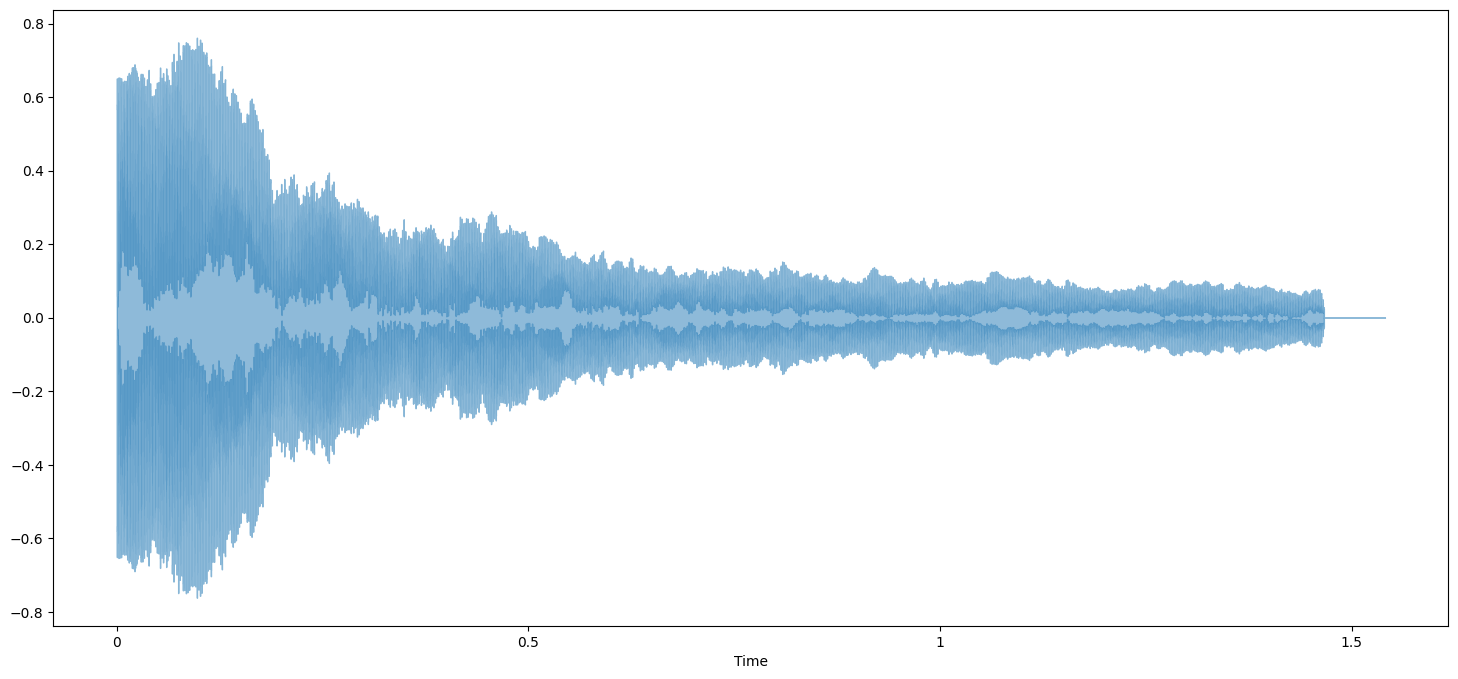

In [4]:
# Plotting the Waveform

plt.figure(figsize=(18, 8))
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()

In [5]:
# Derive spectrum using Fourier Transform (FT)

ft = sp.fft.fft(signal)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude)) 

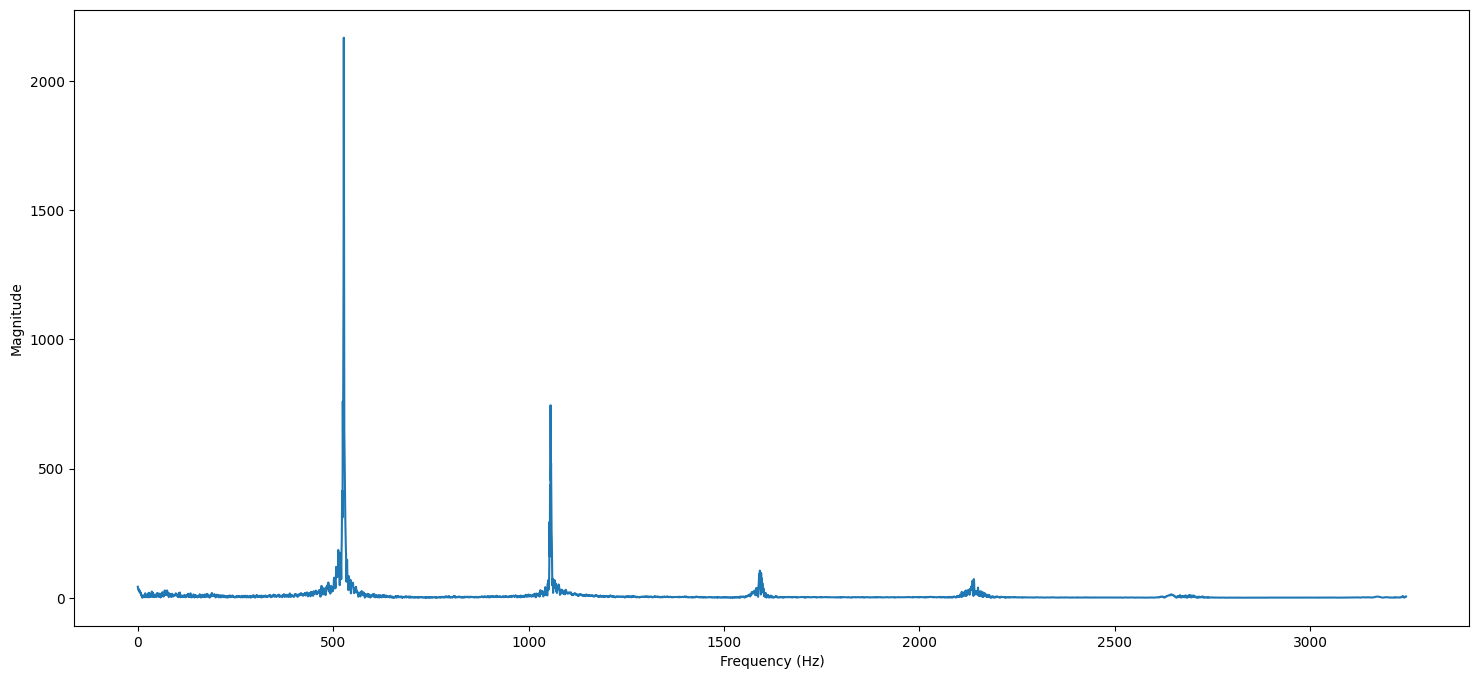

In [7]:
# Plotting the Magnitude Spectrum

plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [8]:
len(signal)

33968

In [20]:
sample_duration = 1 / sr
sample_duration

4.5351473922902495e-05

In [21]:
d_523 = 1 / 523
d_523

0.0019120458891013384

In [23]:
d_400_samples = 400 * sample_duration
d_400_samples

0.018140589569160998

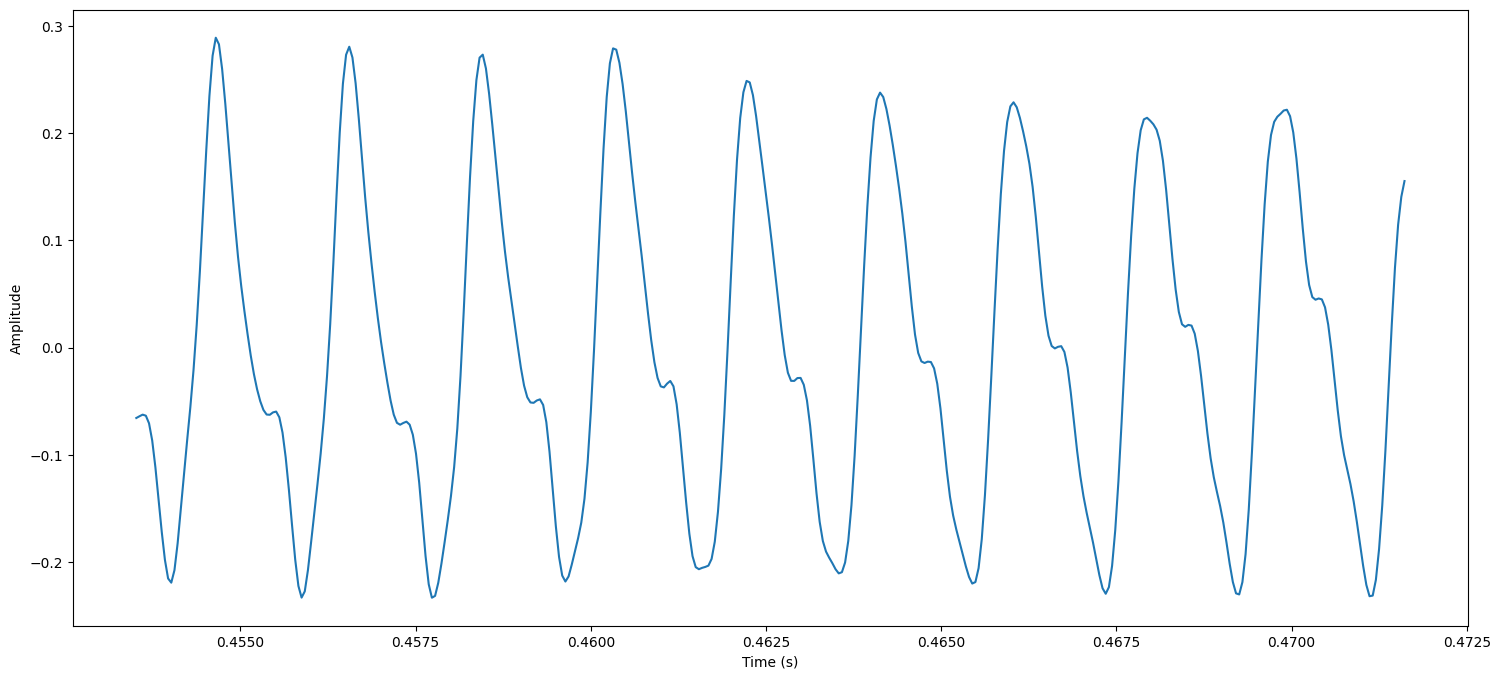

In [24]:
# Zoom in to the waveform - 400 samples

samples = range(len(signal))
t = librosa.samples_to_time(samples, sr=sr)

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

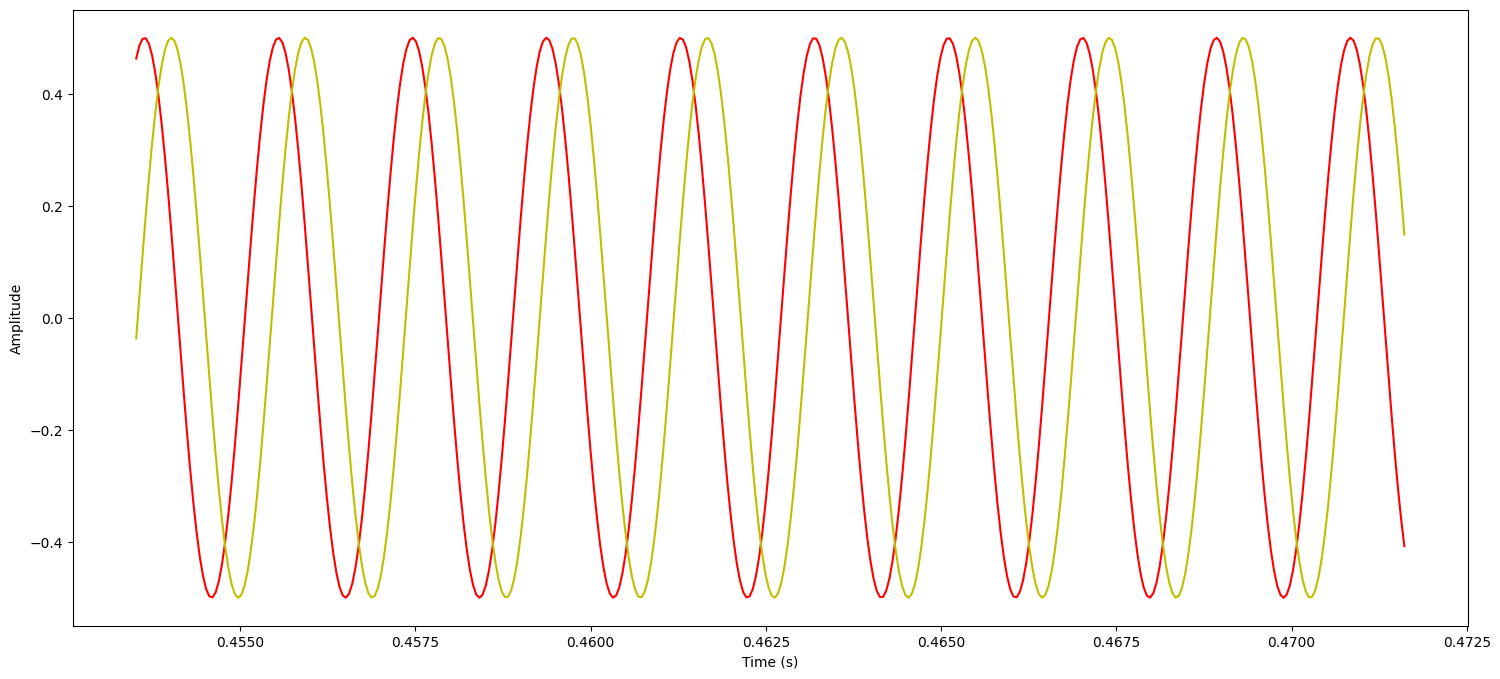

In [25]:
# Creating a sinusoid

f = 523
phase = 0
phase2 = 0.2

sin = 0.5 * np.sin(2*np.pi * (f * t - phase))
sin2 = 0.5 * np.sin(2*np.pi * (f * t - phase2))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], sin2[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

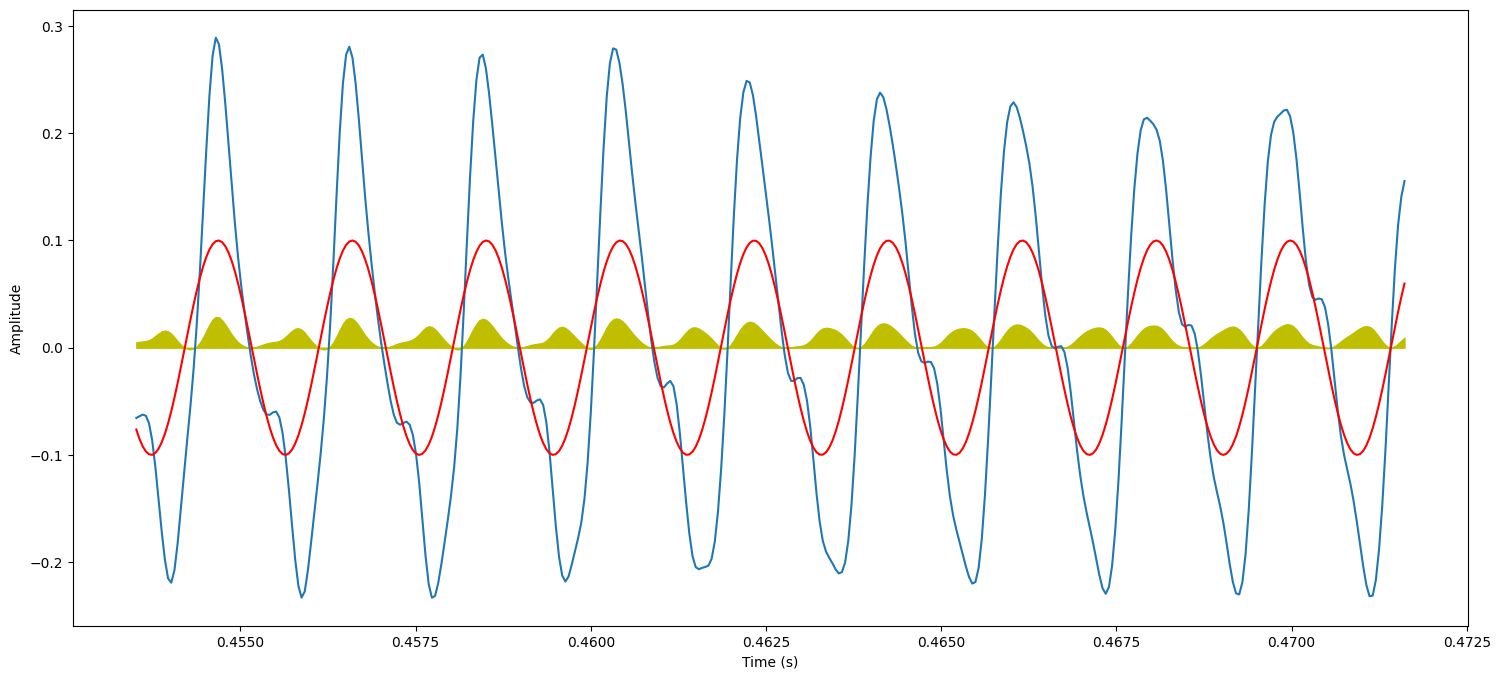

In [26]:
# Comparing Signal and Sinusoids

f = 523
phase = 0.55

sin = 0.1 * np.sin(2*np.pi * (f * t - phase))

plt.figure(figsize=(18, 8))
plt.plot(t[10000:10400], signal[10000:10400]) 
plt.plot(t[10000:10400], sin[10000:10400], color="r")

plt.fill_between(t[10000:10400], sin[10000:10400]*signal[10000:10400], color="y")

plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

#### The higher the "area under the curve" (integral of the product), the greater the similarity between the two sinusoids in terms of frequency and phase alignment.

$$
\varphi_f = \arg\max_{\varphi \in [0, 1]} \left( \int s(t) \cdot \sin\left(2\pi \cdot (f t - \varphi)\right) \, dt \right)
$$

#### This principle underlies the Fourier Transform and correlation analysis, where signals are compared to determine frequency components or alignment.

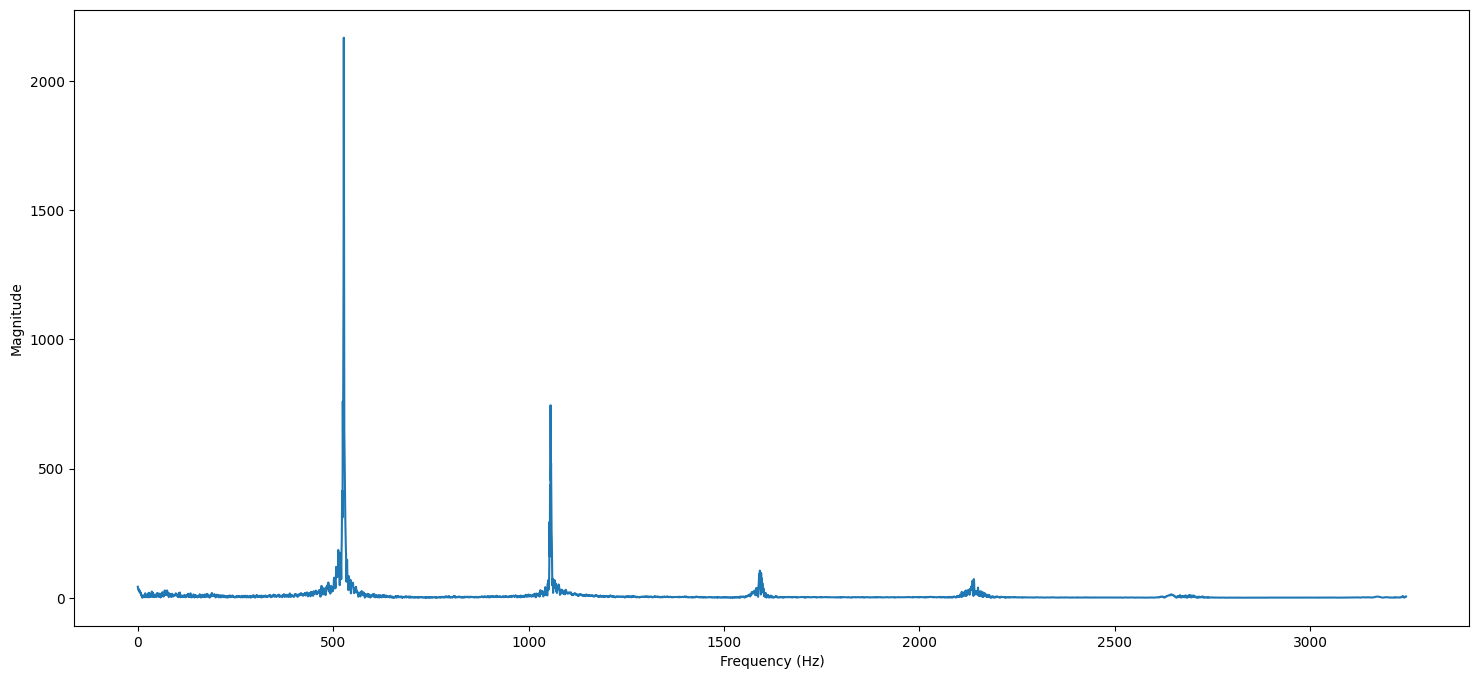

In [27]:
# Plotting the Magnitude Spectrum

plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

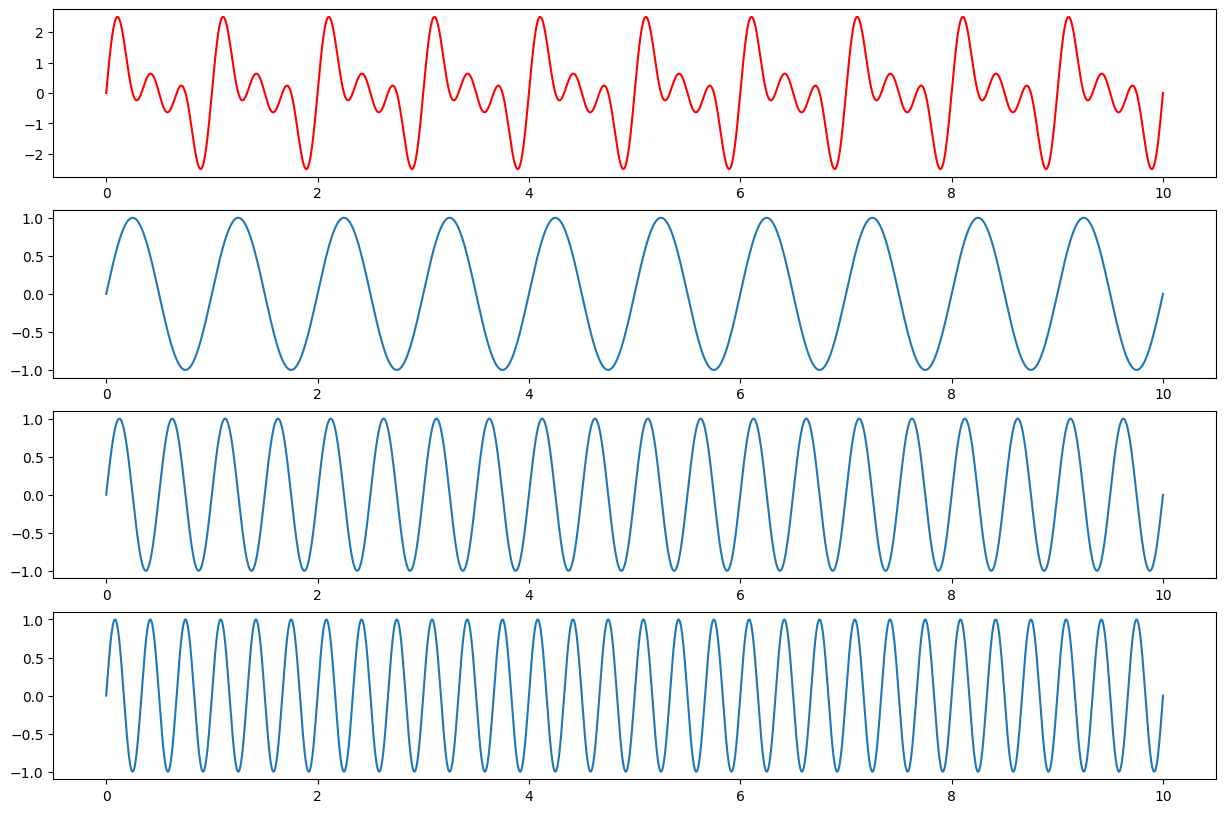

In [29]:
# Superimposing pure tones

f = 1
t = np.linspace(0, 10, 10000)

sin = np.sin(2*np.pi * (f * t))
sin2 = np.sin(2*np.pi * (2*f * t))
sin3 = np.sin(2*np.pi * (3*f * t))

sum_signal = sin + sin2 + sin3

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, sum_signal, color="r")

plt.subplot(4, 1, 2)
plt.plot(t, sin)

plt.subplot(4, 1, 3)
plt.plot(t, sin2)

plt.subplot(4, 1, 4)
plt.plot(t, sin3)

plt.show()